,CasosDia,Temp. Ins. (C),Umi. Ins. (%),Chuva (mm),CasosDiasTarget
Data,,,,,
2020-03-22,3,26.616667,42.500000,4.453936,4
2020-03-23,3,26.462500,52.833333,4.453936,2
2020-03-24,3,24.812500,64.541667,8.800000,2
2020-03-25,1,22.008333,82.000000,28.800000,2
2020-03-26,0,21.225000,83.666667,0.200000,3
...,...,...,...,...,...
2023-12-27,8,22.787500,80.750000,4.453936,3
2023-12-28,4,24.291667,70.416667,4.453936,6
2023-12-29,7,25.687500,69.083333,4.453936,6


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1380 entries, 2020-03-22 to 2023-12-31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CasosDia         1380 non-null   int64  
 1   Temp. Ins. (C)   1380 non-null   float64
 2   Umi. Ins. (%)    1380 non-null   float64
 3   Chuva (mm)       1380 non-null   float64
 4   CasosDiasTarget  1380 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 64.7 KB


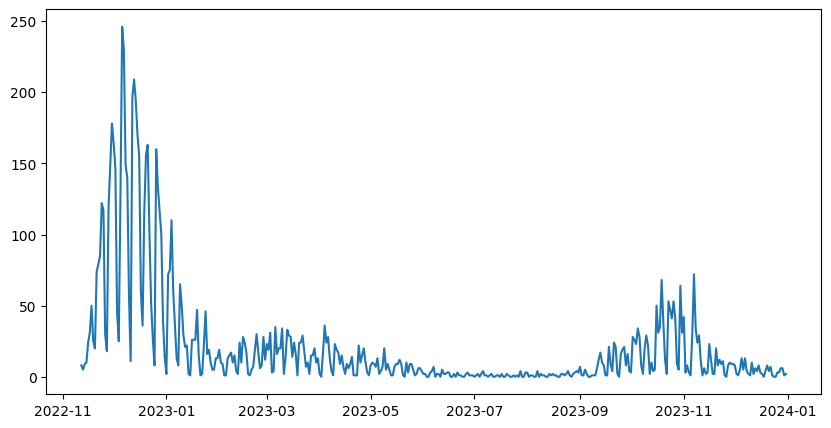

In [1]:
##IMPORTANDO

#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy.stats import mannwhitneyu
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVR 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from scipy.stats import mannwhitneyu
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

# Evitar avisos
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("planilhas/dfDias7desloc.csv", sep=';', parse_dates=['Data'], index_col="Data")
display(df)
df.info()

split = int(0.7 * len(df))
treino = df[:split]
teste = df[split:]


x_treino = treino.drop(columns='CasosDiasTarget')
y_treino = treino['CasosDiasTarget']

x_teste = teste.drop(columns='CasosDiasTarget')
y_teste = teste['CasosDiasTarget']

# Plotar as previsões em relação aos valores reais

plt.figure(figsize=(10, 5))
plt.plot(y_teste)



# Bagging


In [2]:


mseBG = []
rmseBG= []
maeBG= []

p_BGestimators = []
p_BGmodelo = []

svr = SVR()
knr = KNeighborsRegressor()
mlp = MLPRegressor()
dt = DecisionTreeRegressor()

param_grid = {'modelo': [svr, knr, mlp], 'n_estimators':[50,100,150,200]}
#param_grid = {'modelo': [svr, knr, mlp], 'n_estimators':[50]}

melhor_validacao_BG = float('inf')
best_paramsBG = {}

tamanhoRange = 20



for i in range(tamanhoRange):
    print(i+1)
    for m in param_grid['modelo']:
        for estimators in param_grid['n_estimators']:
            BG = BaggingRegressor(estimator=m, n_estimators=estimators)
            BG.fit(x_treino, y_treino)
            opiniao = BG.predict(x_teste)
            mse_validacao_BG = mean_squared_error(y_teste, opiniao)
            
            if (mse_validacao_BG < melhor_validacao_BG):
                melhor_validacao_BG = mse_validacao_BG
                best_paramsBG = {
                    'modelo':m,
                    'n_estimators':estimators
                }


    print(melhor_validacao_BG)
    print(mse_validacao_BG)
    print(best_paramsBG)


    BG = BaggingRegressor(estimator=best_paramsBG['modelo'], n_estimators=best_paramsBG['n_estimators'])
    
    BG.fit(x_treino, y_treino)
    opiniao_BG = BG.predict(x_teste)

    mae = mean_absolute_error(y_teste, opiniao_BG).round(2)
    mse = mean_squared_error(y_teste, opiniao_BG).round(2)
    rmse = np.sqrt(mse).round(2)

    maeBG.append(mae)
    mseBG.append(mse)
    rmseBG.append(rmse)

    p_BGmodelo.append(best_paramsBG['modelo'])
    p_BGestimators.append(best_paramsBG['n_estimators'])



1
402.49124852520464
417.529403306454
{'modelo': SVR(), 'n_estimators': 100}
2
402.3891156001485
418.11410125052873
{'modelo': SVR(), 'n_estimators': 200}
3
402.3891156001485
420.1309899920498
{'modelo': SVR(), 'n_estimators': 200}
4
402.3891156001485
416.10651011106967
{'modelo': SVR(), 'n_estimators': 200}
5
401.13046258679293
419.6964551881622
{'modelo': SVR(), 'n_estimators': 50}
6
401.13046258679293
419.21927956169736
{'modelo': SVR(), 'n_estimators': 50}
7
401.13046258679293
416.8027852904271
{'modelo': SVR(), 'n_estimators': 50}
8
401.13046258679293
418.2274072093051
{'modelo': SVR(), 'n_estimators': 50}
9
401.13046258679293
418.10095981393266
{'modelo': SVR(), 'n_estimators': 50}
10
401.13046258679293
417.0363691611277
{'modelo': SVR(), 'n_estimators': 50}
11
401.13046258679293
415.92994818934653
{'modelo': SVR(), 'n_estimators': 50}
12
401.13046258679293
415.5746215816032
{'modelo': SVR(), 'n_estimators': 50}
13
401.13046258679293
416.76839559018225
{'modelo': SVR(), 'n_estima

In [3]:
# RESULTADOS !!!!
maxp_BGmodelo = max(set(p_BGmodelo), key=p_BGmodelo.count)
maxp_BGestimators = max(set(p_BGestimators), key=p_BGestimators.count)




media_maeBG = np.mean(maeBG)
media_mseBG = np.mean(mseBG)
media_rmseBG = np.mean(rmseBG)

p_BGmodelo.append(maxp_BGmodelo)
p_BGestimators.append(maxp_BGestimators)


maeBG.append(media_maeBG)
mseBG.append(media_mseBG)
rmseBG.append(media_rmseBG)

dfBG = pd.DataFrame({
    'modelo':p_BGmodelo,
    'estimators':p_BGestimators,
    'MAE': maeBG,
    'MSE': mseBG,
    'RMSE': rmseBG
})



print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")

display(dfBG)
dfBG.to_csv('resultadosModelos/dfBG.csv', sep = ';', index = False, encoding='UTF-8')


O ÚLTIMO VALOR (20) É A MÉDIA !!!


,modelo,estimators,MAE,MSE,RMSE
0,SVR(),100,13.20,404.2000,20.1000
1,SVR(),200,13.14,402.8600,20.0700
2,SVR(),200,13.33,405.9000,20.1500
3,SVR(),200,13.24,403.7000,20.0900
4,SVR(),50,13.16,403.2200,20.0800
5,SVR(),50,13.25,404.5800,20.1100
6,SVR(),50,13.15,402.5200,20.0600
7,SVR(),50,13.35,406.0500,20.1500
8,SVR(),50,13.16,403.8600,20.1000
9,SVR(),50,13.45,407.1300,20.1800


In [5]:
import joblib

joblib.dump(opiniao_BG, 'predsSalva/bagging.pkl')


['predsSalva/bagging.pkl']

# CHECKPOINT

In [6]:
import joblib

opiniao_BG = joblib.load('predsSalva/bagging.pkl')

DatetimeIndex(['2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-19',
               '2022-11-20', '2022-11-21',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='Data', length=415, freq=None)


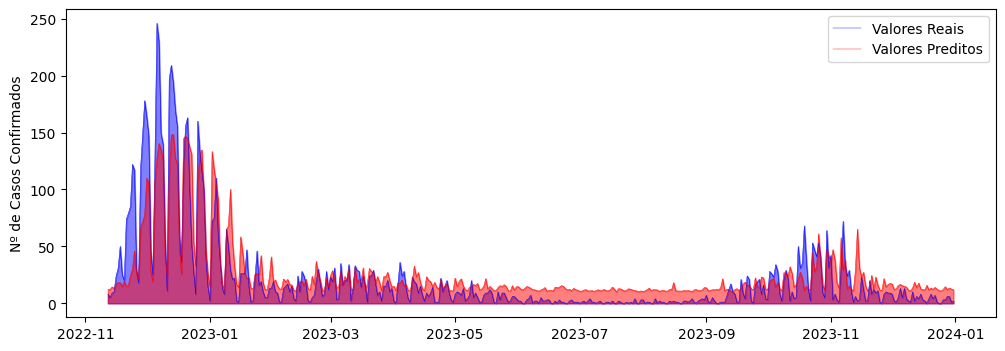

Numero de casos reais:  8737
Numero de casos predito:  10354


In [7]:
len(opiniao_BG)

print(x_teste.index)

aux=opiniao_BG
serie = pd.Series(aux, index=x_teste.index)

stringGraf = 'graficos/4-'+ 'bagging' + '.pdf'
plt.figure(figsize=(12, 4))
plt.plot(y_teste, label='Valores Reais', color='blue', linewidth=0.3)
plt.plot(serie, label='Valores Preditos', color='red', linewidth=0.3)
plt.fill_between(x_teste.index, y_teste, color='blue', alpha=0.5)
plt.fill_between(x_teste.index, serie, color='red', alpha=0.5)  # Pinta a área entre as linhas
plt.ylabel('Nº de Casos Confirmados')
plt.legend()
plt.savefig(stringGraf, dpi=300, bbox_inches="tight")
plt.show()

n_pred = int(aux.sum())
print('Numero de casos reais: ', y_teste.sum())
print('Numero de casos predito: ', n_pred)